<a href="https://colab.research.google.com/github/adgadiwan09/Week-4-Deep_Learning/blob/master/Digit_recognistion(mnist).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.2.0'

In [4]:
mnist = tf.keras.datasets.mnist 
(x_train,y_train),(x_test,y_test) =mnist.load_data()
#training and testing data

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [10]:
x_train[0].shape

(28, 28)

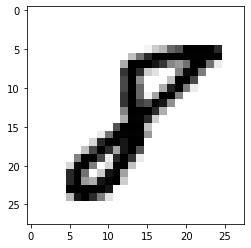

In [20]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1519], cmap='gray_r')
plt.show()

In [19]:
y_train[1519]

8

In [21]:
#Normalization 0 to 1
x_train= x_train/255
x_test= x_test/255

In [23]:
x_train[0].max()

1.0

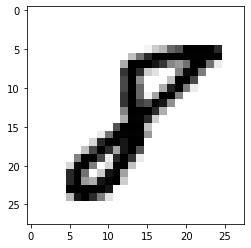

In [29]:
plt.imshow(x_train[1519], cmap='gray_r')
plt.show()

In [30]:
model= tf.keras.models.Sequential()

In [31]:
x_train.shape[1:]

(28, 28)

In [34]:
model.add(tf.keras.layers.Flatten())                                                           #Input Layer
model.add(tf.keras.layers.Dense(128,input_shape= x_train.shape[1:],activation='relu'))         #Hidden Layer 1
model.add(tf.keras.layers.Dense(128,activation='relu'))                                        #Hidden Layer 2  
model.add(tf.keras.layers.Dense(10,activation='softmax'))                                      #Output Layer

#Flatten() will store all the pixel values of one image in one neuron 
#In output layer we have taken 10 neurons as we want 10 outputs(0-9) and activation fuction is taken as sotmax

In [37]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics =['accuracy'])
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2371 - accuracy: 0.9287
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1153 - accuracy: 0.9647
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0881 - accuracy: 0.9725
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0713 - accuracy: 0.9772
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0619 - accuracy: 0.9801


In [39]:
y_pred= model.predict_classes(x_test)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 2, 1, ..., 4, 5, 6])

In [40]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_pred,y_test)

array([[ 968,    0,    3,    0,    0,    3,    7,    2,    3,    8],
       [   2, 1125,    0,    0,    1,    0,    4,    2,    3,    3],
       [   2,    4, 1018,   14,    4,    0,    2,   14,    2,    1],
       [   0,    0,    1,  961,    1,    7,    0,    4,   12,   13],
       [   1,    0,    1,    0,  952,    0,    4,    1,    2,    8],
       [   2,    3,    0,   29,    1,  872,    9,    0,    6,    7],
       [   1,    1,    2,    0,    4,    1,  924,    0,    1,    0],
       [   1,    0,    5,    4,    4,    1,    0,  995,    2,    8],
       [   3,    2,    2,    1,    1,    7,    8,    4,  943,   21],
       [   0,    0,    0,    1,   14,    1,    0,    6,    0,  940]])

In [43]:
accuracy_score(y_pred,y_test)

0.9698